## 曲面的拟合和绘制

本节小目标

- 使用 scipy 实现曲面的线性拟合


- 使用 scipy 实现曲面的非线性线性拟合


- 使用径向基函数实现曲面数据的非线性拟合

In [153]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 导入 Matplotlib 三维绘图工具包
from mpl_toolkits.mplot3d import axes3d

In [154]:
%matplotlib notebook

In [155]:
# 图形风格和窗口大小设置
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8, 5.8)

### 3D 曲面绘制

<IPython.core.display.Javascript object>


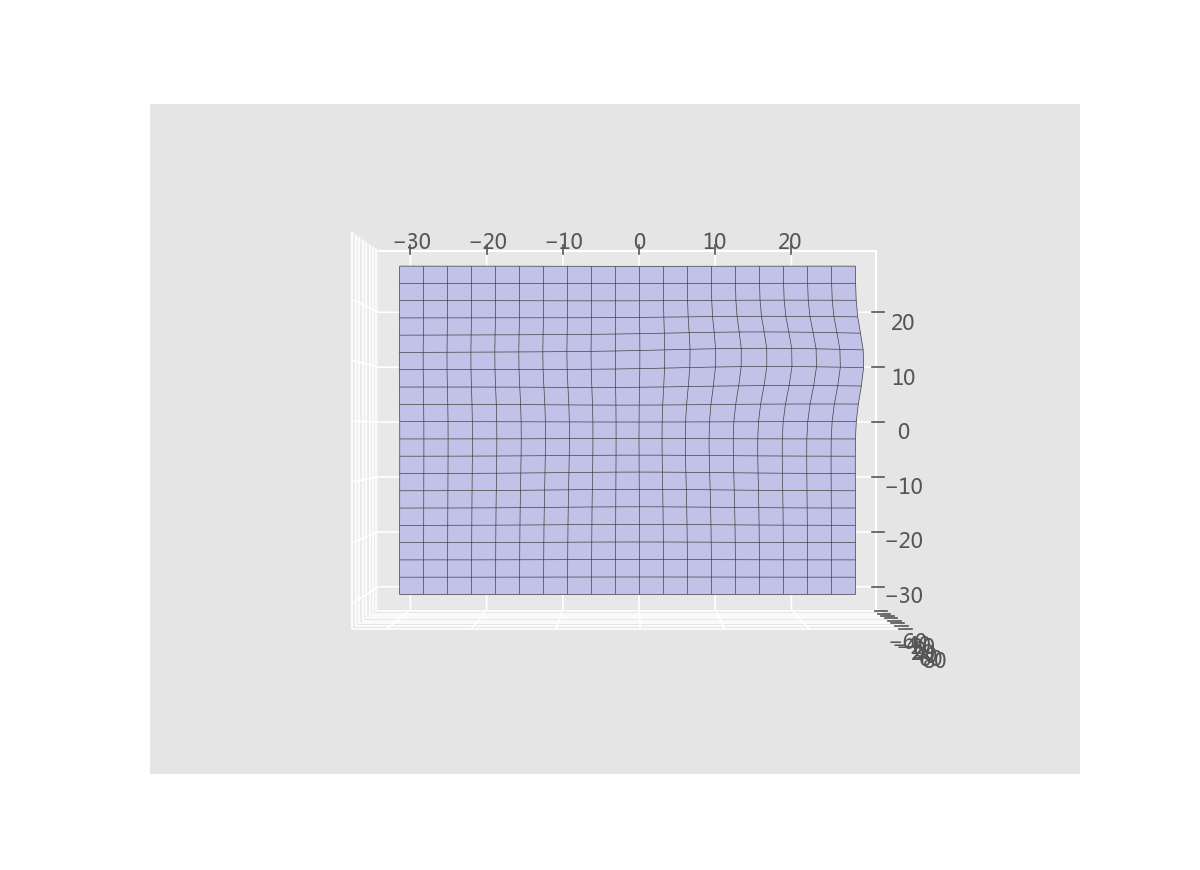

In [156]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111, projection='3d')

# 加载测试数据
X, Y, Z = axes3d.get_test_data(0.3)

# 绘制面片
ax0.plot_surface(X, Y, Z, rstride=1, cstride=1, shade=False, color='#c2c2e9')

# 绘制线框图
ax0.plot_wireframe(X, Y, Z, rstride=1, cstride=1, linewidth=0.32, color='#393939');

# 初始化视图角度
ax0.view_init(90, -90)

In [13]:
X.shape,Z.shape

((20, 20), (20, 20))

In [157]:
# 给数据加噪
np.random.seed(10)
xdata = X + 0.35 * np.random.randn(20, 20)
ydata = Y + 0.56 * np.random.randn(20, 20)
zdata = Z + 0.82 * np.random.randn(20, 20)

<IPython.core.display.Javascript object>


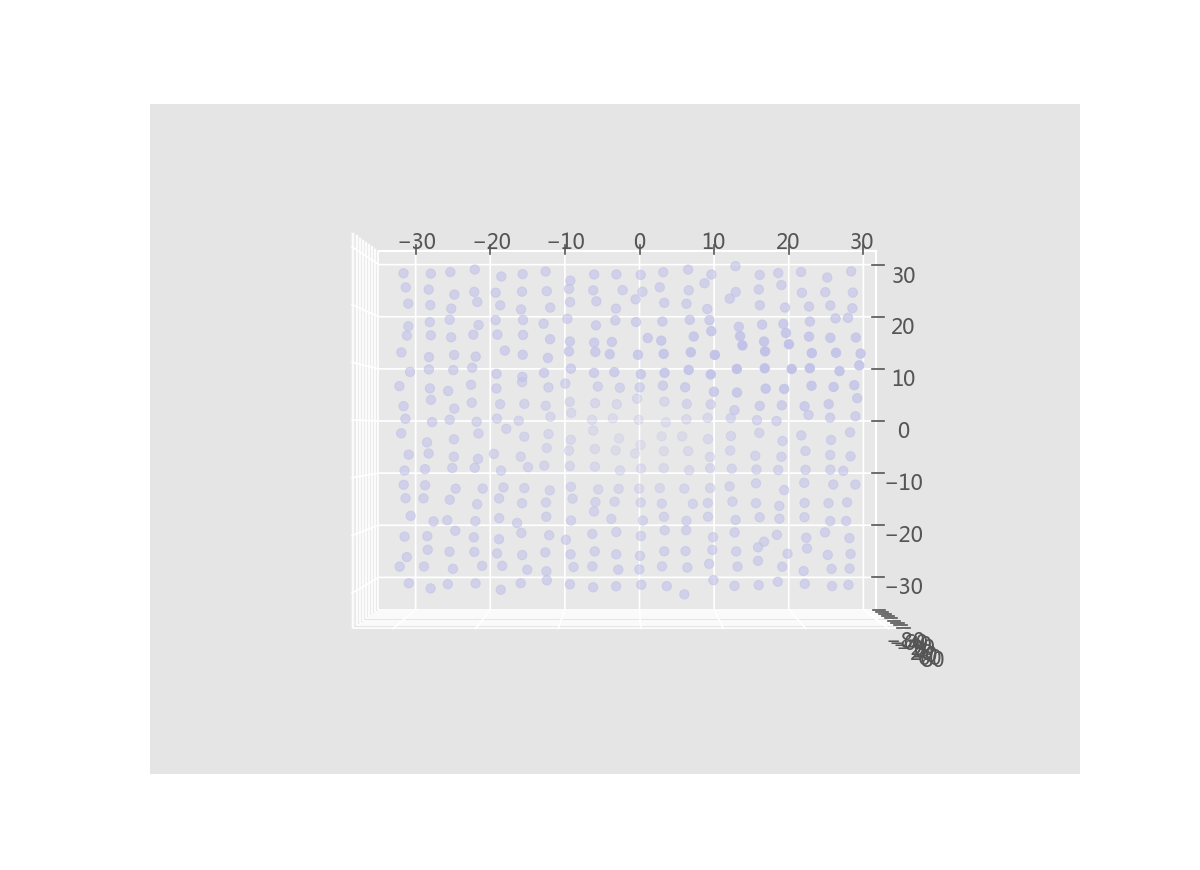

In [158]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')


ax1.scatter(xdata, ydata, zdata, color='#c2c2e9');
ax1.view_init(90, -90)

### 使用 scipy 的模块 optimize 实现 3D 数据的线性和非线性拟合

In [159]:
from scipy import optimize

### 拟合 3D 曲面

- 首先，回顾一下拟合 2D 平面曲线。


- 思考如何推广到拟合 3D 空间曲面。

In [185]:
def f(x, a, b):
    return a*np.sin(b*np.pi*x)

# 生成带噪数据
p = [5, 5]
x = np.linspace(0, 1, 30)
np.random.seed(10)
y = f(x, *p) + .5*np.random.normal(size=len(x))
xn = np.linspace(0, 1, 200)

<IPython.core.display.Javascript object>


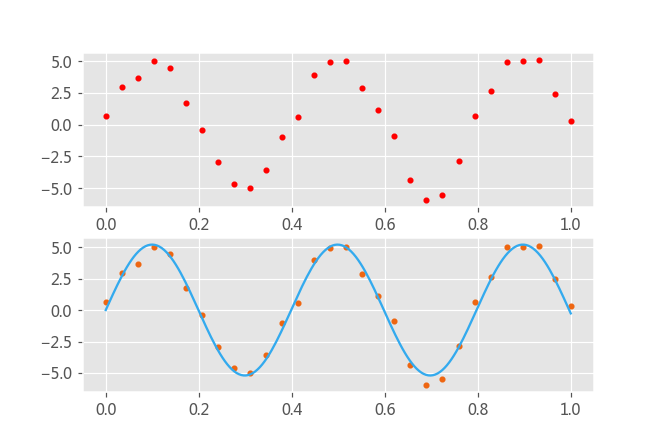

[5.20012398 5.01625385]


In [186]:
fig0 = plt.figure(figsize=(6, 4))

ax01 = fig0.add_subplot(211)
ax01.plot(x, y, 'or', markersize=3)

p0 = [3, 4]
popt, pcov = optimize.curve_fit(f, x, y, p0=p0)
print(popt)

ax02 = fig0.add_subplot(212)
ax02.plot(x, y, 'o', markersize=3, color='#ee6611');
ax02.plot(xn, f(xn, *popt), '-', color='#33aaee');

### 拟合 3D 空间曲面

- 定义曲面函数，确定待求参数


- 定义残差函数，调用最小二乘拟合

In [162]:
# 创建随机数据 x 和 y 的范围均为 [-1, 1].
np.random.seed(10)
x = 2 * (np.random.random(200) - 0.5)
y = 2 * (np.random.random(200) - 0.5)

# 从函数 f(x, y) 上采样 z
def f(x, y):
    return np.exp(-(x + y ** 2))

z = f(x, y)

data = np.c_[x, y, z]

In [163]:
data.shape

(200, 3)

<IPython.core.display.Javascript object>


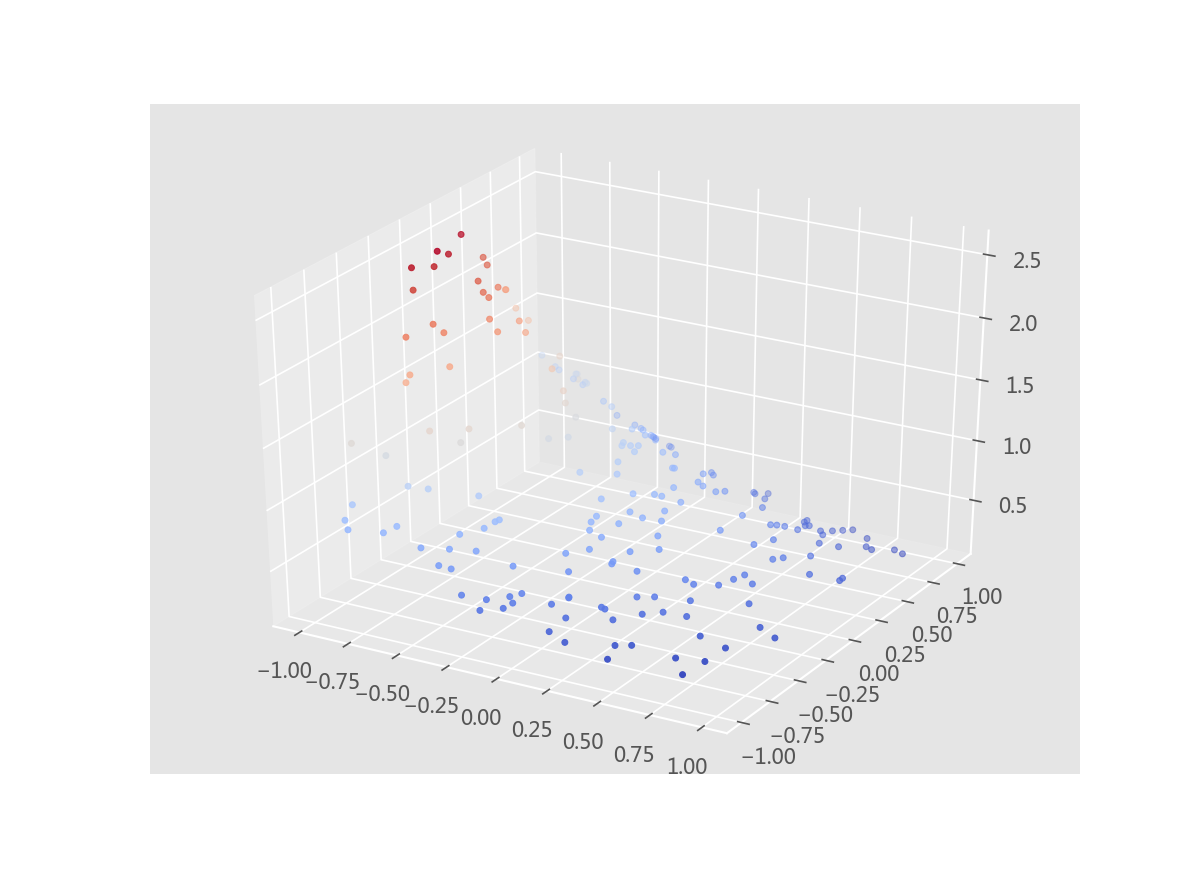

In [164]:
# 创建 figure
fig1 = plt.figure(figsize=(8,5.8))

# 创建图轴并绘制散点数据
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap='coolwarm', s=8);

In [32]:
# 定义平面
def fit_1_surface(p, x, y):
    return p[0]*x + p[1]*y + p[2]

# 定义二次曲面
def fit_2_surface(p, x, y):
    return p[0]*x**2 + p[1]*x*y + p[2]*y**2 + p[3]*x + p[4]*y +p[5]

In [165]:
# 定义残差函数，用平面拟合数据
def residual_1(p, x, y, z):
    pre_z = fit_1_surface(p, x, y)
    return (z - pre_z)

# 待求参数的初始值
p1 = [1,1,1]

# 拟合
popt1 = optimize.leastsq(residual_1, p1, args=(data[:,0], data[:,1], data[:,2]))
popt1

(array([-0.83317053,  0.04130986,  0.84649115]), 1)

In [166]:
# 定义残差函数，用二次曲面拟合数据
def residual_2(p, x, y, z):
    pre_z = fit_2_surface(p, x, y)
    return (z - pre_z)

# 待求参数的初始值
p2 = [1,1,1,1,1,1]

# 拟合
popt2 = optimize.leastsq(residual_2, p2, args=(data[:,0], data[:,1], data[:,2]))
popt2

(array([ 0.42070738,  0.01537977, -0.90563766, -0.83085367, -0.01524131,
         1.03546971]), 1)

In [167]:
# 生成 xy 坐标网格
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)

X, Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))

In [168]:
# 根据上面求得的参数计算拟合平面
Z_1 = fit_1_surface(popt1[0], X, Y)
Z_1.shape

(20, 20)

In [169]:
# 根据上面求得的参数计算拟合曲面
Z_2 = fit_2_surface(popt2[0], X, Y)
Z_2.shape

(20, 20)

<IPython.core.display.Javascript object>


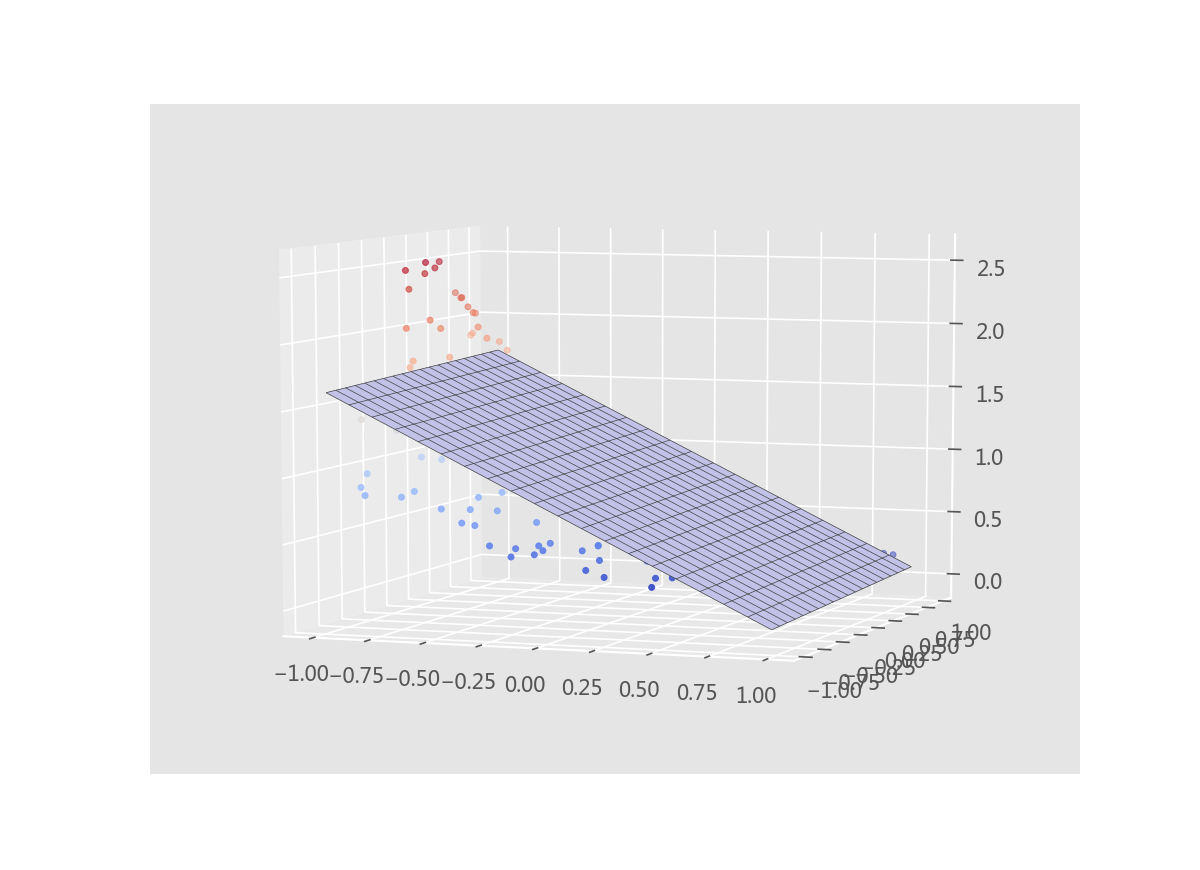

In [170]:
# 创建 figure
fig2 = plt.figure(figsize=(8,5.8))

# 创建图轴并绘制坐标网格
ax2 = fig2.add_subplot(111, projection='3d')

# 绘制面片
ax2.plot_surface(X, Y, Z_1, rstride=1, cstride=1, shade=False, color='#c2c2e9')

# 绘制线框图
ax2.plot_wireframe(X, Y, Z_1, rstride=1, cstride=1, linewidth=0.32, color='#393939');

# 绘制原始数据散点图
ax2.scatter(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap='coolwarm', s=8);
ax2.view_init(7, -70)

<IPython.core.display.Javascript object>


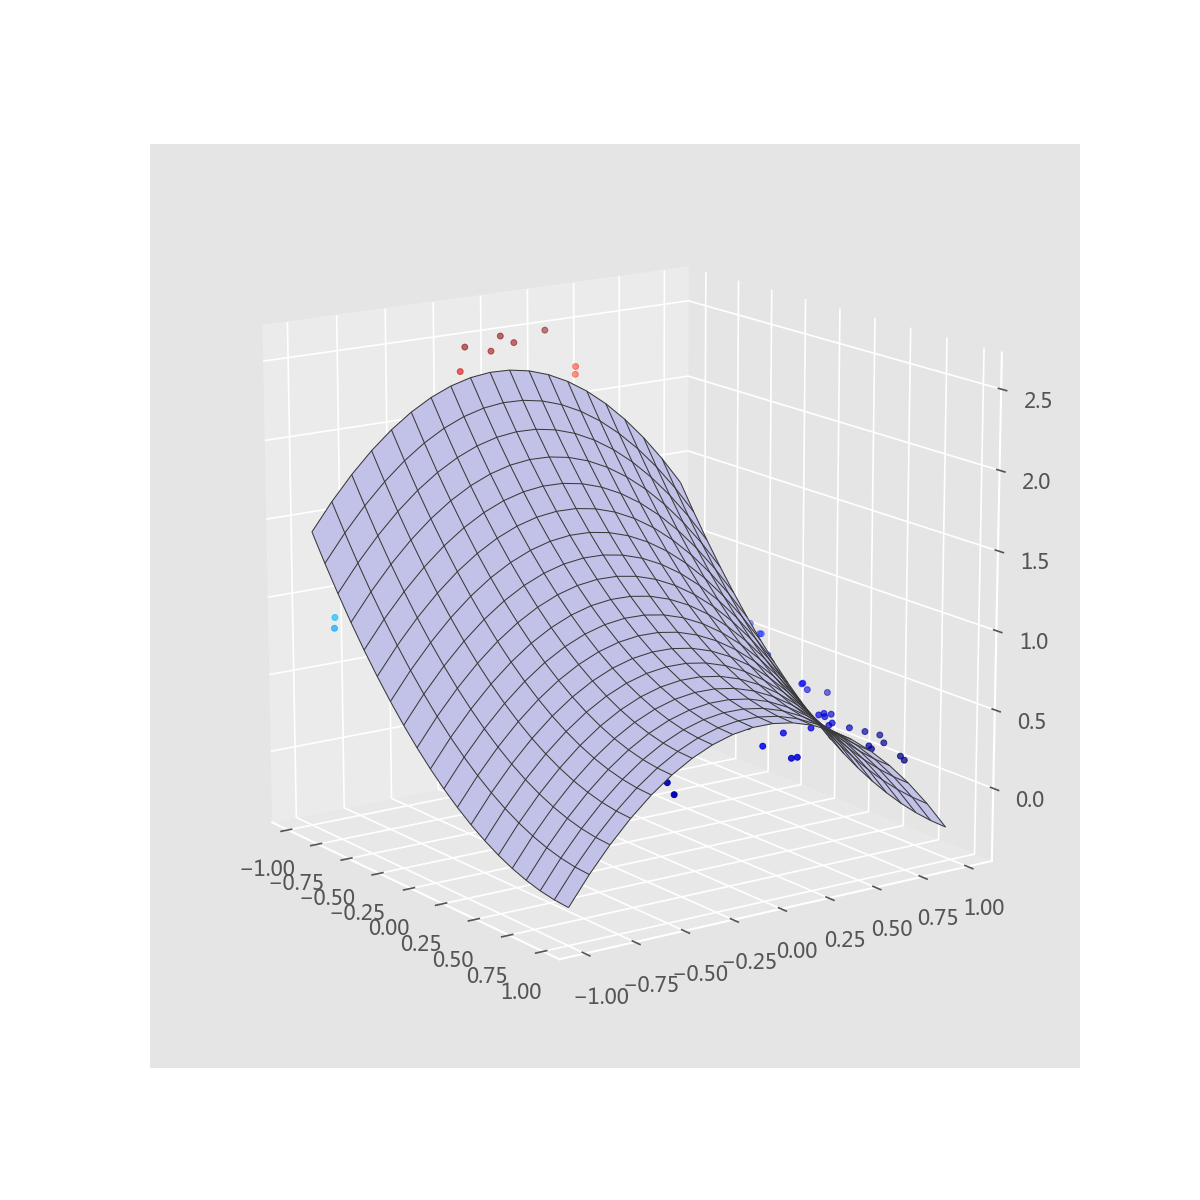

In [51]:
# 创建 figure
fig3 = plt.figure(figsize=(8,8))

# 创建图轴
ax3 = fig3.add_subplot(111, projection='3d')

# 绘制拟合曲面
ax3.plot_surface(X, Y, Z_2, rstride=1, cstride=1, shade=False, color='#c2c2e9')#cmap='coolwarm')
ax3.plot_wireframe(X, Y, Z_2, linewidth=0.5, color='#393939');

# 绘制原始数据散点图
ax3.scatter(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap='jet', s=8);

ax3.view_init(15, -35)

#### 这里有个问题，到底该用怎么样的函数去拟合数据呢？三次或者更高次的曲面吗？

### 径向基函数拟合空间数据

#### 使用径向基函数 RBF 进行曲线拟合

曲线拟合的目的是从一组测量数据对 $\left(x_{i}, y_{i}\right)$ 中找出未知函数 $f$ 的最佳估计，其中 $y_{i}$ 是在 $x_{i}$ 点处的第 $i$ 个观测值。这种关系可以表示为

$$
y_{i}=f\left(x_{i}\right)+\epsilon_{i}
$$

其中 $i=1, \ldots, n$，而 $\epsilon_{i}$ 表示随机误差。

我们假设 $f$ 是一个平滑函数，可以通过在区间 $[a, b]$ 上的 $m$ 个基函数的线性组合来近似逼近。考虑到 $C=\left\{c_{1}, \ldots, c_{m}\right\}$ 是在自变量 $x$ 的定义域内的一组位置，则线性模型是由放置在某些位置的 $m$ 个基函数构成的。在这些假设下，函数 $f$ 可以写为以下线性组合：

$$
f(x)=\sum_{i=1}^{m} \lambda_{i} \Phi_{i}\left(\left|x-c_{i}\right|\right)
$$

其中 $\lambda_{i}$ 是与第 $i$ 个基函数 $\Phi_{i}$ 相关联的系数。

如果预先指定了基函数 $\Phi$ 的类型，则只要找到基函数的数目 $m$ 和与之相关的参数，然后计算模型系数 $\lambda_{i}$，就可以完全确定 $f$。

#### 二维曲线例子

<IPython.core.display.Javascript object>


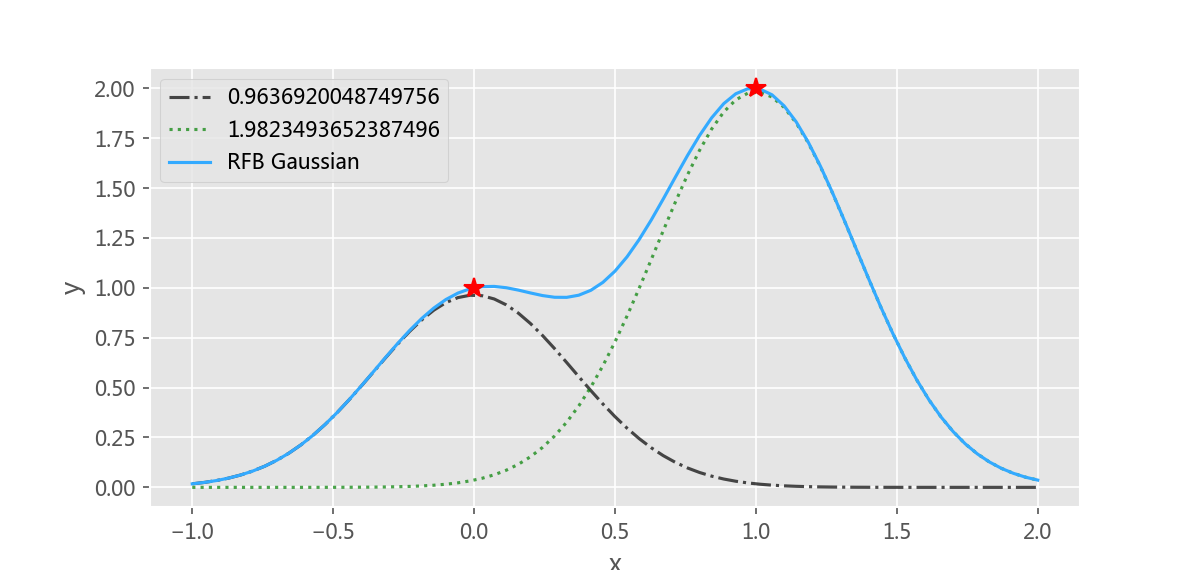

In [171]:
from scipy.interpolate import Rbf

x, y = [0, 1], [1, 2]
x_fine = np.linspace(-1, 2, 71)

interp_fun = Rbf(x, y, function='gaussian')

y_fine = interp_fun(x_fine)

fig5 = plt.figure(figsize=(8,3.8))

for x0, weight in zip( x, interp_fun.nodes ):
    if x0 == 0:
        plt.plot(x_fine, weight*interp_fun._function(x_fine-x0), '-.k', alpha=.7, label=str(weight))
    else:
        plt.plot(x_fine, weight*interp_fun._function(x_fine-x0), ':g', alpha=.7, label=str(weight))

plt.plot(x_fine, y_fine, '#33aaff', label='RFB Gaussian')
plt.plot(x, y, '*r', markersize=10);
plt.xlabel('x'); 
plt.ylabel('y'); 
plt.legend();

上面代码由两个高斯基函数（虚线）混合成一个函数（蓝色曲线）。

而数据的拟合过程是根据数据点去求各个基函数的参数以及权值，从而得到蓝色曲线。

#### 使用径向基函数拟合和插值曲线

#### 参数说明

function : str or callable, optional
    The radial basis function, based on the radius, r, given by the norm
    (default is Euclidean distance); the default is 'multiquadric'::

        'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)


smooth : float, optional
    Values greater than zero increase the smoothness of the
    approximation.  0 is for interpolation (default), the function will
    always go through the nodal points in this case.


<IPython.core.display.Javascript object>


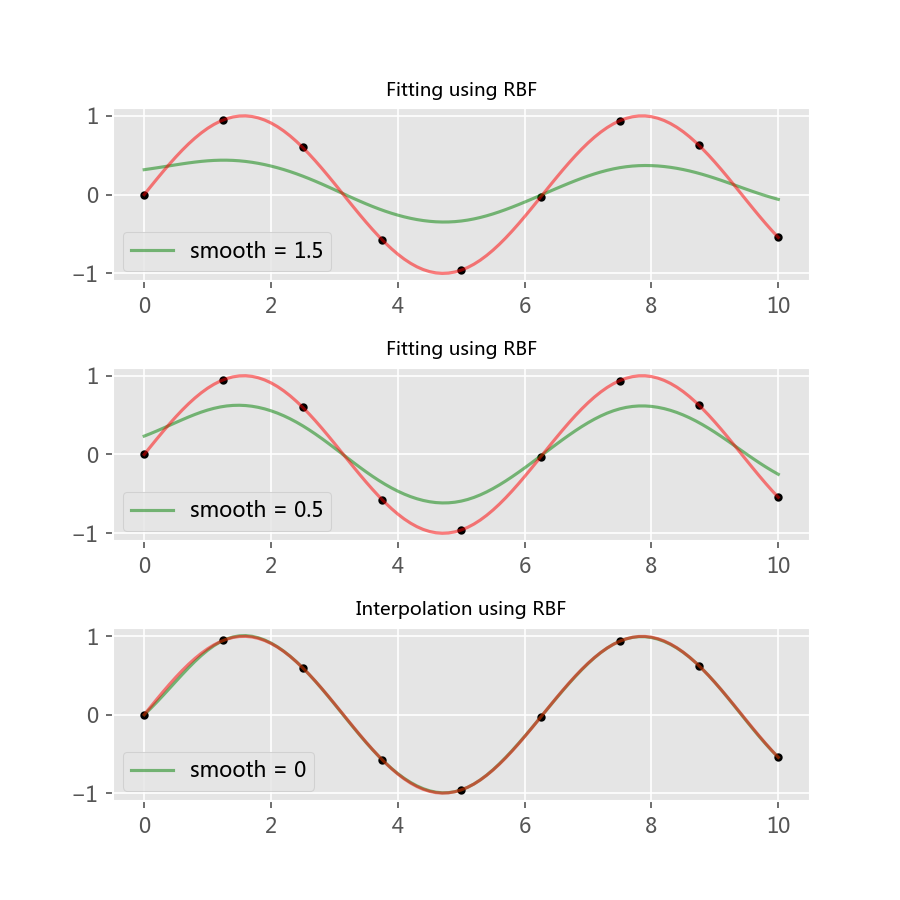

Text(0.5, 1.0, 'Interpolation using RBF')

In [173]:
# 生成数据
x = np.linspace(0, 10, 9)
y = np.sin(x)
xi = np.linspace(0, 10, 101)

fig6 = plt.figure(figsize=(6,6))
fig6.subplots_adjust(hspace=0.5)
# 使用 RBF 拟合
rbf = Rbf(x, y, smooth=1.5)
fi = rbf(xi)

plt.subplot(3, 1, 1)
plt.plot(x, y, 'ko', markersize=3)
plt.plot(xi, fi, 'g', label='smooth = 1.5', alpha=0.5)
plt.plot(xi, np.sin(xi), 'r', alpha=0.5)
plt.legend()

plt.title('Fitting using RBF', fontsize=9)

# 使用 RBF 拟合
rbf = Rbf(x, y, smooth=0.5)
fi = rbf(xi)

plt.subplot(3, 1, 2)
plt.plot(x, y, 'ko', markersize=3)
plt.plot(xi, fi, 'g', label='smooth = 0.5', alpha=0.5)
plt.plot(xi, np.sin(xi), 'r', alpha=0.5)
plt.legend()
plt.title('Fitting using RBF', fontsize=9)

# 使用 RBF 插值
rbf = Rbf(x, y, smooth=0)
fi = rbf(xi)

plt.subplot(3, 1, 3)
plt.plot(x, y, 'ko', markersize=3)
plt.plot(xi, fi, 'g', label='smooth = 0', alpha=0.5)
plt.plot(xi, np.sin(xi), 'r', alpha=0.5)

plt.legend()
plt.title('Interpolation using RBF', fontsize=9)

#### 另一个例子

<IPython.core.display.Javascript object>


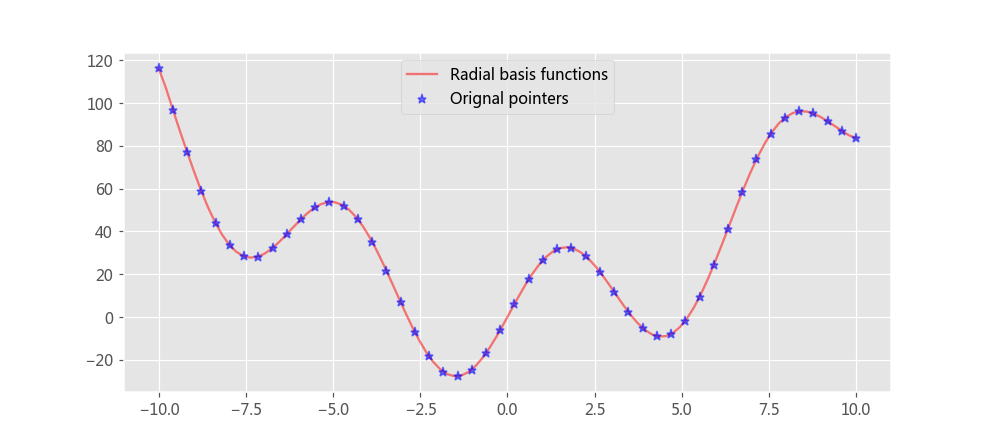

In [198]:
def f(x):
    return x ** 2 + 30 * np.sin(x)

x1 = np.linspace(-10, 10, 50)
y1 = f(x1)

rf = Rbf(x1, y1)
x2 = np.linspace(-10, 10, 100)
y2 = rf(x2)

fig00 = plt.figure(figsize=(9, 4))
plt.plot(x2, y2, 'r-', x1, y1, 'b*', alpha=0.5, markersize=6)
plt.legend(["Radial basis functions", "Orignal pointers"],loc='upper center')
plt.show()

#### 用径向基函数拟合前面的三维数据

In [174]:
# 此处代码实现拟合曲面
spline = Rbf？
Z = spline(X, Y)

In [175]:
X.shape

(20, 20)

<IPython.core.display.Javascript object>


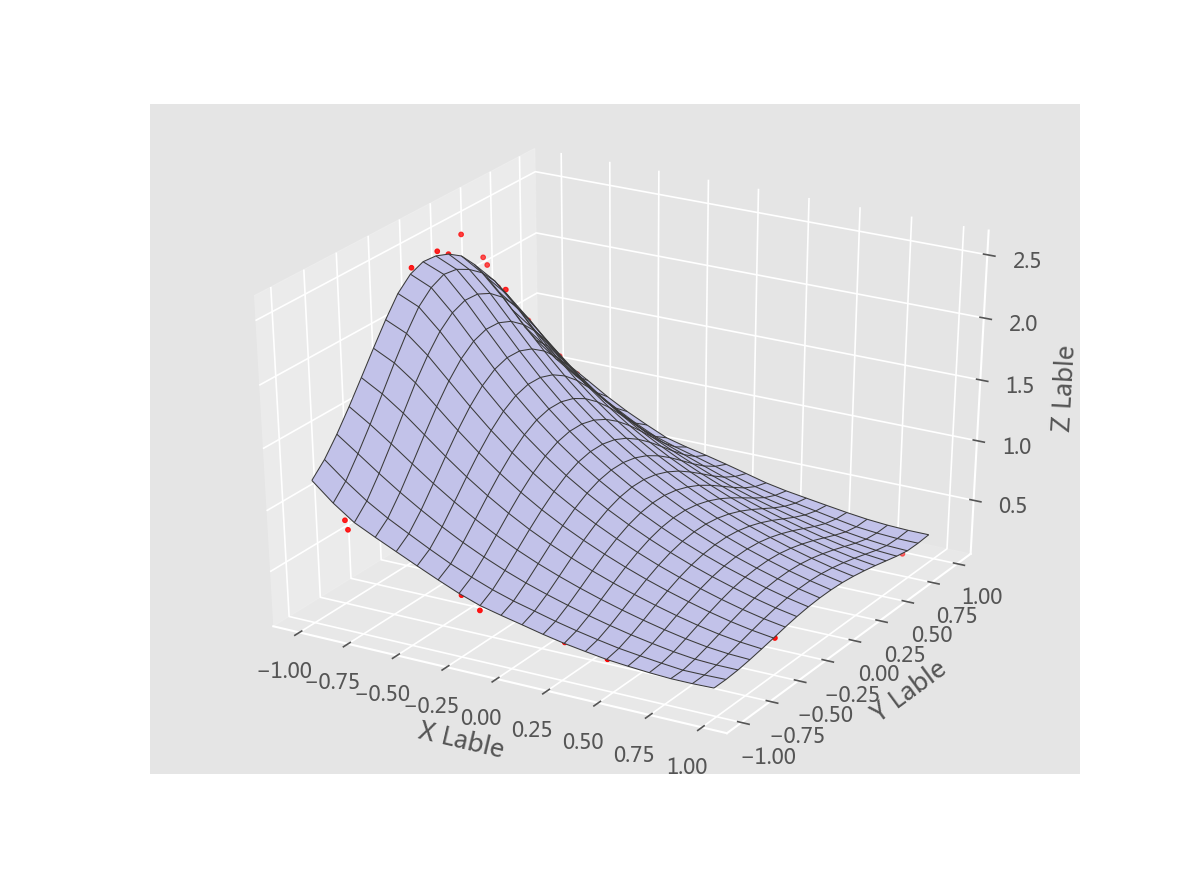

(-1.090471188201567, 1.0736186706611404, -1.08016156497528, 1.0891213379555498)

In [176]:
# 创建 figure
fig7 = plt.figure()
ax7  = fig7.add_subplot(111, projection='3d')

# 绘制拟合曲面
ax7.plot_surface(X, Y, Z, rstride=1, cstride=1, shade=False, color='#c2c2e9')
#ax5.plot_surface(X, Y, Z, rstride=1, cstride=1, shade=False, cmap='viridis_r')
ax7.plot_wireframe(X, Y, Z, linewidth=0.5, color='#393939');

ax7.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', s=5)

ax7.set_xlabel('X Lable')
ax7.set_ylabel('Y Lable')
ax7.set_zlabel('Z Lable')
ax7.axis('tight')